# Import required Packages

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import data
from skimage import filters
from skimage import exposure
import mahotas as mh
from pylab import imshow, show

### Read Image file

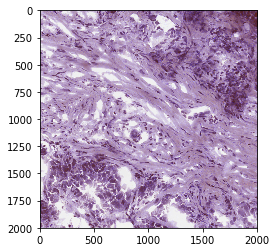

In [2]:
img = cv2.imread('62_7_1_normal.jpeg',0)
img_mt=mpimg.imread('62_7_1_normal.jpeg')
plt.imshow(img_mt)

## Image Enhancing

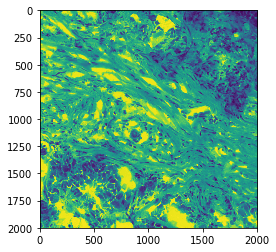

In [3]:
 img = cv2.GaussianBlur(img,(5,5),0)
 plt.imshow(img)

## Otsu_thresholding_option1

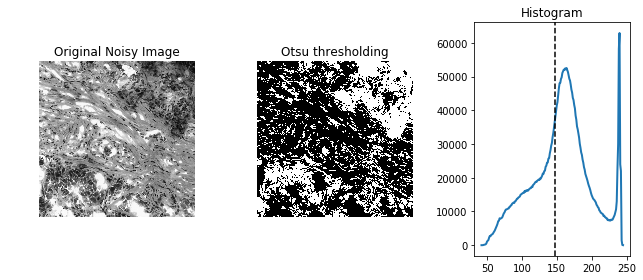

Number of objects found: 1892


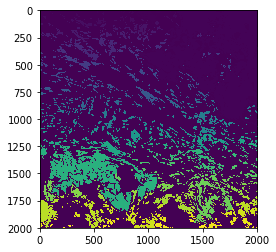

In [4]:
######################Otsu_thresholding_option1######################
val = filters.threshold_otsu(img)
hist, bins_center = exposure.histogram(img)
plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.title('Original Noisy Image')
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.title('Otsu thresholding')
plt.imshow(img < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.title('Histogram')
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')
plt.tight_layout()
plt.show()
##################################################################
########################Counting cells with connected component labeling with otsu option1########################
labeled, nr_objects = mh.label(img < val)
print("Number of objects found: "+ str(nr_objects))
imshow(labeled)
show()

## Otsu_thresholding_option2

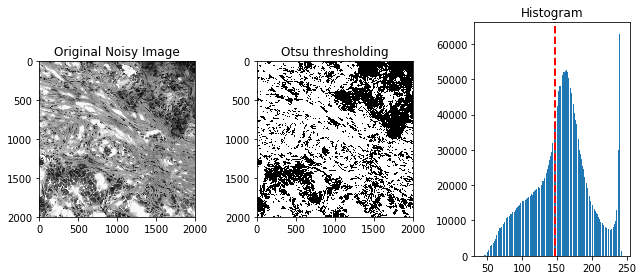

Number of objects found: 878


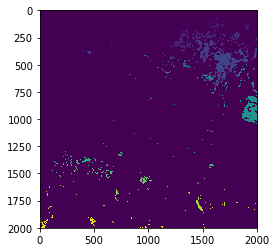

In [5]:

##################################################################
######################Otsu_thresholding_option2############################################
ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(9, 4))
plt.subplot(131), plt.imshow(img,cmap = 'gray')
plt.title('Original Noisy Image')#, plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding')#, plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.hist(img.ravel(), 256)
plt.axvline(x=ret, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram')#, plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()
##################################################################
########################Counting cells with connected component labeling otsu option2########################
labeled, nr_objects = mh.label(imgf)
print("Number of objects found: "+ str(nr_objects))
imshow(labeled)
show()
#plt.imshow(labeled)

#plt.jet()

##################################################################